<a href="https://colab.research.google.com/github/hws2002/Master-Python-with-Just-One-Book-ADP/blob/main/Chapter8/Mock1/mock_test1_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 회귀분석

## 데이터를 8:2로 분할하고 선형회귀를 적용하시오, 결정계수와 rmse를 구하시오


In [2]:
!pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 7.7 MB/s eta 0:00:00


먼저 데이터를 로드해온다.

In [ ]:
import pandas as pd
import mglearn

X, y = mglearn.datasets.load_extended_boston()

그 후 X와 y를 살펴보자

In [15]:
print("X.shape : ", X.shape)
X

X.shape :  (506, 104)


array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        1.00000000e+00, 8.96799117e-02, 8.04248656e-03],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        1.00000000e+00, 2.04470199e-01, 4.18080621e-02],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        9.79579831e-01, 6.28144504e-02, 4.02790570e-03],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        1.00000000e+00, 1.07891832e-01, 1.16406475e-02],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        9.82676920e-01, 1.29930407e-01, 1.71795127e-02],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        1.00000000e+00, 1.69701987e-01, 2.87987643e-02]])

In [14]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

데이터를 8:2로 분할한다

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

선형 회귀를 적용한다.  


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lr = LinearRegression()
model = lr.fit(X_train,y_train)

lr_mse = mean_squared_error(y_test, model.predict(X_test))
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, model.predict(X_test))


print("선형 회귀 결정계수 : ", lr_r2)
print("선형 회귀 RMSE : ", lr_rmse)

선형 회귀 결정계수 :  0.6158858584078805
선형 회귀 RMSE :  5.592657237078601


모델 정확도는 약 61.5%이며, RMSE값은 5.56이다. 이는 모델이 예측할 때 실제 값과의 차이가 약 5.6정도 난다는 의미이다.

## 데이터를 8:2로 분할하고 릿지 회귀를 적용하시오. alpha값을 0부터 1까지 0.1단위로 모두 탐색해서 결정계수가 가장 높을 때의 알파를 찾고, 해당 알파로 다시 모델을 학습해서 결정계수와 rmse를 계산하시오.

0부터 1까지 0.1단위로 모두 탐색 -> gridsearch

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = [{
    'alpha' : np.linspace(0,1,11)
}]

grid_ridge = GridSearchCV(estimator = Ridge(),
                          param_grid = param_grid,
                          cv = 10,
                          scoring = 'r2'
                          )
grid_ridge.fit(X_train, y_train)
print(grid_ridge.best_score_)
print(grid_ridge.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.30991e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.17069e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.31832e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.35029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

0.8579957793667029
{'alpha': 0.1}


In [41]:
ridge_results = pd.DataFrame(grid_ridge.cv_results_['params'])
ridge_results['mean_test_score'] = grid_ridge.cv_results_['mean_test_score']
ridge_results.sort_values(by = 'mean_test_score', ascending = False, inplace = True)
ridge_results

,alpha,mean_test_score
1,0.1,0.857996
2,0.2,0.854550
3,0.3,0.850874
4,0.4,0.847348
5,0.5,0.844027
6,0.6,0.840909
7,0.7,0.837976
8,0.8,0.835209
9,0.9,0.832592
10,1.0,0.830108


결정계수가 가장 높을 때의 알파는 0.1이다.

In [46]:
best_ridge = grid_ridge.best_estimator_
best_ridge.fit(X_train, y_train)
pred_ridge = best_ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, pred_ridge)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(y_test, pred_ridge)
print("릿지 회귀 결정계수 : ", ridge_r2)
print("릿지 회귀 rmse : ", ridge_rmse)

릿지 회귀 결정계수 :  0.7463824108919275
릿지 회귀 rmse :  4.544412437236797


## 데이터를 8:2로 분할하고 라쏘 회귀를 적용하시오. alpha값을 0부터 1까지 0.1단위로 모두 탐색해서 결정계수가 가장 높을 때의 알파를 찾고, 해당 알파로 다시 모델을 학습해서 결정계수와 rmse를 계산하시오.

In [52]:
param_grid = [{
    'alpha' : np.linspace(0,1,11)
}]

grid_lasso = GridSearchCV(estimator = Lasso(),
                          param_grid = param_grid,
                          cv = 10,
                          scoring = "r2"
                          )
grid_lasso.fit(X_train, y_train)
print(grid_lasso.best_score_)
print(grid_lasso.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.997e+02, tolerance: 3.075e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

0.8328818864158629
{'alpha': 0.0}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.040e+03, tolerance: 3.440e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

In [53]:
lasso_results = pd.DataFrame(grid_lasso.cv_results_['params'])
lasso_results['mean_test_score'] = grid_lasso.cv_results_['mean_test_score']
lasso_results.sort_values(by = 'mean_test_score', ascending = False, inplace = True)
lasso_results

,alpha,mean_test_score
0,0.0,0.832882
1,0.1,0.738636
2,0.2,0.715136
3,0.3,0.688984
4,0.4,0.649750
5,0.5,0.599435
6,0.6,0.541466
7,0.7,0.479112
8,0.8,0.411745
9,0.9,0.348606


In [54]:
best_lasso = grid_lasso.best_estimator_
best_lasso.fit(X_train, y_train)
pred_lasso = best_lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, pred_lasso)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2 = r2_score(y_test, pred_lasso)
print("릿지 회귀 결정계수 : ", lasso_r2)
print("릿지 회귀 rmse : ", lasso_rmse)

릿지 회귀 결정계수 :  0.6901880385279786
릿지 회귀 rmse :  5.02269891844733


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.040e+03, tolerance: 3.440e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

In [55]:
models = pd.DataFrame(['naive','ridge','lasso'])
mses = pd.DataFrame([lr_rmse, ridge_rmse, lasso_rmse])

mse = pd.concat([models, mses], axis = 1)
mse.columns = ['model', 'mse']
mse

,model,mse
0,naive,5.592657
1,ridge,4.544412
2,lasso,5.022699


릿지 회귀가 가장 낮은 mse를 보였다.

# 2. 다항 회귀분석 시각화


## 다항 선형 회귀를 다항 회귀로 3차까지 적용시켜 계수를 구하고 3차항을 적용한 모델의 스캐터 플롯과 기울기 선을 그리시오.

In [83]:
x = 6*np.random.rand(100,1)-3
y = 3*x**3 + x**2 + 2*x + 2 + np.random.randn(100,1) # 노이즈 포함
line = np.linspace(-3,3,100, endpoint = False).reshape(-1,1)


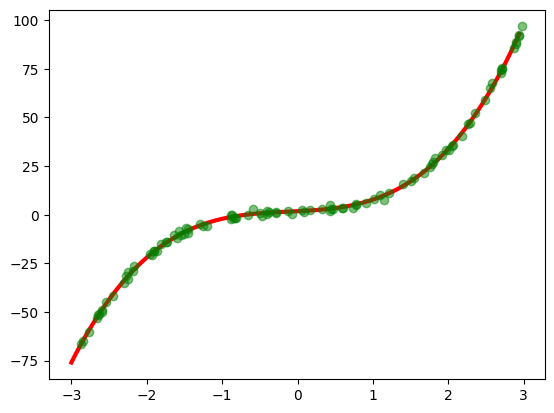

In [90]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(x)
line_poly = poly_reg.transform(line)

reg = LinearRegression().fit(X_poly, y)

plt.plot(line, reg.predict(line_poly), c = 'r', linewidth = 3)
plt.plot(x,y, 'o', c = 'g', alpha = 0.5)
plt.show()

# 3. ANOVA 분석

## 변수 3개(하나는 범주형 변수/ 나머지 두 개는 수치형 연속변수)의 이원분산분석을 수행하고 통계표를 작성하시오

In [150]:
df = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/refs/heads/main/data/avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [152]:
df = df[['AveragePrice','type','region']]
df = df[ (df['region'] == 'Orlando') |
         (df['region'] == 'Boston') |
         (df['region'] == 'Chicago') ].reset_index(drop = True)
df

,AveragePrice,type,region
0,1.13,conventional,Boston
1,1.07,conventional,Boston
2,1.01,conventional,Boston
3,1.02,conventional,Boston
4,1.19,conventional,Boston
...,...,...,...
1009,1.36,organic,Orlando
1010,1.67,organic,Orlando
1011,1.53,organic,Orlando
1012,1.55,organic,Orlando


In [153]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula ='AveragePrice ~ C(type) + C(region) + C(type):C(region)'
model = ols(formula, df).fit()
aov_table = anova_lm(model, typ = 2)
aov_table

,sum_sq,df,F,PR(>F)
C(type),56.111007,1.0,828.218296,1.989417e-133
C(region),0.432136,2.0,3.189242,4.161918e-02
C(type):C(region),1.878817,2.0,13.866003,1.146622e-06
Residual,68.291047,1008.0,NaN,NaN


먼저 교호작용에 대해 p-value가 0.05보다 작으므로, 귀무가설을 기각한다. 즉, region 과 avocado type간에는 상호작용 효과가 있다고 볼 수 있다.  

주효과 검정에 대해서도 모두 귀무가설이 기각되므로, region종류와 type종류에 따른 AveragePrice 차이는 존재한다고 볼 수 있다.  

더 직관적으로 판단하기 위해 그래프로 해당 모델을 표현해보자.

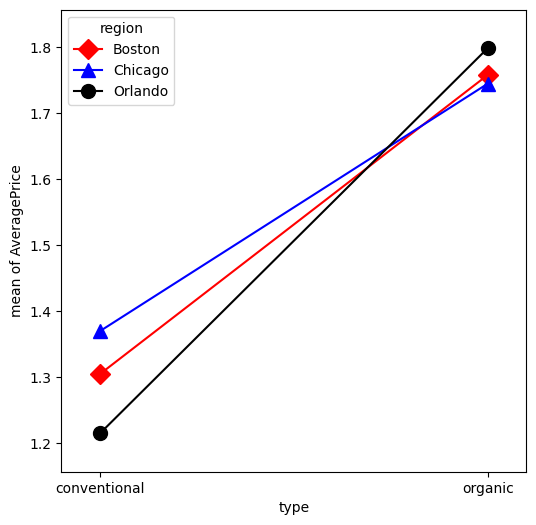

In [157]:
from statsmodels.graphics.factorplots import interaction_plot


fig, ax = plt.subplots(figsize = (6,6,))

fig = interaction_plot(df['type'], df['region'], df['AveragePrice'],
                       colors = ['r', 'b','k'],
                       markers = ['D', '^','o'],
                       ms = 10, ax = ax)

통계표에서 보았던 상호작용 효과와 각 변수별 차이가 확실히 나타남을 알 수 있다.  
특히 orlando에서는 다른 지역보다 conventional 대비 organic의 선호도가 높음을 알 수 있다.  